# Descriptive statistics for the databases with existing adapters:
## (IEDB, VDJdb, McPAS-TCR, CEDAR & TRAIT)
_Note: make sure that the biocypher_config uses "pandas" as dbms of choice for this notebook_
1. Create pandas KG out of each of the db separately
2. Generate statistics about the sequences overlap
3. Visualize the sequences lengths overlaps

In [21]:
# %pip install git+https://github.com/biocypher/biocypher.git

In [1]:
import sys
sys.path.append('..')

from argparse import ArgumentParser, ArgumentError

from biocypher import BioCypher
from tcr_epitope.adapters.iedb_adapter import IEDBAdapter
from tcr_epitope.adapters.vdjdb_adapter import VDJDBAdapter
from tcr_epitope.adapters.mcpas_adapter import MCPASAdapter
from tcr_epitope.adapters.cedar_adapter import CEDARAdapter
from tcr_epitope.adapters.trait_adapter import TRAITAdapter

INFO -- This is BioCypher v0.9.3.
INFO -- Logging into `biocypher-log/biocypher-20250603-134421.log`.


## 1. Create pandas KG out of each of the db separately

In [3]:
bc_mcpas = BioCypher(cache_directory="../cache", biocypher_config_path="../config/biocypher_config.yaml",
    schema_config_path="../config/schema_config.yaml")
adapt = MCPASAdapter(bc_mcpas, test = False)
bc_mcpas.add(adapt.get_nodes())
bc_mcpas.add(adapt.get_edges())
mcpas = bc_mcpas.to_df()

INFO -- Running BioCypher with schema configuration from ../config/schema_config.yaml.
INFO -- Loading cache file ../cache/cache.json.
INFO -- Use cached version from ../cache/mcpas_latest.
/home/lera/tcr-epitope/notebooks/../tcr_epitope/adapters/mcpas_adapter.py:40: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  table = pd.read_csv(table_path, encoding="utf-8-sig")
INFO -- Use cached version from ../cache/iedb_exact_matches_15b9794ec6d642c7b502aa2153707cf0.
INFO -- Use cached version from ../cache/iedb_exact_matches_34f7e7c15744f4ac8495c22a623634d2.
INFO -- Use cached version from ../cache/iedb_exact_matches_212e43df6b37083ec23b2a6e7498af58.
INFO -- Use cached version from ../cache/iedb_substring_matches151e5e2714ad0806b7178e6cfd4847b7.


Mapping AA epitope sequences to IEDB IDs: exact matches...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(PQPELPYPQPQ,ATDALMTGY,GILGFVFTL,LLFGYP...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(MLLKHDVSL,ISPRTLNAW,MMPFSIVYIV,MLYQHLL...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(FMYSDFHFI,QVELGGGPGAG,ILIVMFPFL,SIIGRL...
Found 350 exact IEDB ID matches. Trying substring matches for 29 remaining epitopes...
Final results: 360 of 379 epitopes matched to IEDB IDs (95.0%)


INFO -- Loading ontologies...
INFO -- Instantiating OntologyAdapter class for https://github.com/biolink/biolink-model/raw/v3.2.1/biolink-model.owl.ttl.
WARNING -- Duplicate node type tra sequence found. 
WARNING -- Duplicate node type trb sequence found. 
WARNING -- Duplicate node type epitope found. 


In [4]:
bc_vdjdb = BioCypher(cache_directory="../cache", biocypher_config_path="../config/biocypher_config.yaml",
    schema_config_path="../config/schema_config.yaml")
adapt = VDJDBAdapter(bc_vdjdb, test = False)
bc_vdjdb.add(adapt.get_nodes())
bc_vdjdb.add(adapt.get_edges())
vdjdb = bc_vdjdb.to_df()

INFO -- Running BioCypher with schema configuration from ../config/schema_config.yaml.
INFO -- Loading cache file ../cache/cache.json.
INFO -- Use cached version from ../cache/vdjdb_latest.
INFO -- Use cached version from ../cache/iedb_exact_matches_0242d2bfd2965ffdaa6c11b9dbb55800.
INFO -- Use cached version from ../cache/iedb_exact_matches_e1ec8cb475e322bbbc3839cd14947b0c.
INFO -- Use cached version from ../cache/iedb_exact_matches_bc154da74b42120ab793c92f40cc436d.
INFO -- Use cached version from ../cache/iedb_exact_matches_2f713f62777ced23e3f2d9b39fbf47a1.
INFO -- Use cached version from ../cache/iedb_exact_matches_d4cd67a2bb425c6e28c151e449432d3e.
INFO -- Use cached version from ../cache/iedb_exact_matches_78740dae0b82ca68714447307d3780b3.
INFO -- Use cached version from ../cache/iedb_exact_matches_7c512cff4c8f22805e76fd152a52bcb1.
INFO -- Use cached version from ../cache/iedb_exact_matches_e15d5f9832af66fed71b32beb9a414ca.
INFO -- Use cached version from ../cache/iedb_exact_matche

Mapping AA epitope sequences to IEDB IDs: exact matches...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(HPNGYKSLSTL,RPIIRPATL,QMMVKAGL,TPRVTGG...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(FLNGSCGSV,KLMPVCVET,RIMTWLDMV,AVLDMCAS...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(FPLCANGQV,FPFTSFGPL,RTAPHGHEL,RPDTRYVL...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(LIIMRTFKV,KVSIWNLDY,KLFIRQEEV,KIILFLAL...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(TVYGFCLL,SSLENFRAYV,ASNENMETM,LSLRNPIL...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(VPYMAEFGM,QAFWIDLFETIG,KLVALVINAV,YQFG...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(YLQQNWWTL,MALWMRLL,MAALPRLIAF,GSHLVEAL...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(PQPELPYPQPQL,FPQPEQPFPWQP,TLWCSPIKV,FM...
Reque

INFO -- Loading ontologies...
INFO -- Instantiating OntologyAdapter class for https://github.com/biolink/biolink-model/raw/v3.2.1/biolink-model.owl.ttl.
WARNING -- Duplicate node type tra sequence found. 
WARNING -- Duplicate node type trb sequence found. 
WARNING -- Duplicate node type epitope found. 


In [5]:
bc_iedb = BioCypher(cache_directory="../cache", biocypher_config_path="../config/biocypher_config.yaml",
    schema_config_path="../config/schema_config.yaml")
adapt = IEDBAdapter(bc_iedb, test = False)
bc_iedb.add(adapt.get_nodes())
bc_iedb.add(adapt.get_edges())
iedb = bc_iedb.to_df()

INFO -- Running BioCypher with schema configuration from ../config/schema_config.yaml.
INFO -- Loading cache file ../cache/cache.json.
INFO -- Use cached version from ../cache/iedb_latest.
/home/lera/tcr-epitope/notebooks/../tcr_epitope/adapters/iedb_adapter.py:57: DtypeWarning: Columns (2,10,12,13,14,15,16,17,18,19,20,21,22,23,24,29,30,35,36,41,42,43,44,45,46,47,48,49,50,51,52,53,58,59,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  tcr_table = pd.read_csv(tcr_table_path, header=[0, 1])
/home/lera/tcr-epitope/notebooks/../tcr_epitope/adapters/iedb_adapter.py:62: DtypeWarning: Columns (14,18,43) have mixed types. Specify dtype option on import or set low_memory=False.
  bcr_table = pd.read_csv(bcr_table_path, header=[0, 1])
INFO -- Loading ontologies...
INFO -- Instantiating OntologyAdapter class for https://github.com/biolink/biolink-model/raw/v3.2.1/biolink-model.owl.ttl.
WARNING -- Duplicate node type tra sequence found. 
WARNING -- Duplicate node 

In [6]:
bc_cedar = BioCypher(cache_directory="../cache", biocypher_config_path="../config/biocypher_config.yaml",
    schema_config_path="../config/schema_config.yaml")
adapt = CEDARAdapter(bc_cedar, test = False)
bc_cedar.add(adapt.get_nodes())
bc_cedar.add(adapt.get_edges())
cedar = bc_cedar.to_df()

INFO -- Running BioCypher with schema configuration from ../config/schema_config.yaml.
INFO -- Loading cache file ../cache/cache.json.
INFO -- Use cached version from ../cache/cedar_latest.
/home/lera/tcr-epitope/notebooks/../tcr_epitope/adapters/cedar_adapter.py:57: DtypeWarning: Columns (2,10,12,13,14,15,16,17,19,20,21,22,23,24,29,30,35,36,41,42,43,44,45,46,47,48,49,50,51,52,53,58,59,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  tcr_table = pd.read_csv(tcr_table_path, header=[0, 1])
INFO -- Loading ontologies...
INFO -- Instantiating OntologyAdapter class for https://github.com/biolink/biolink-model/raw/v3.2.1/biolink-model.owl.ttl.
WARNING -- Duplicate node type tra sequence found. 
WARNING -- Duplicate node type igh sequence found. 
WARNING -- Duplicate node type trb sequence found. 
WARNING -- Duplicate node type igl sequence found. 
WARNING -- Duplicate node type epitope found. 


In [7]:
bc_trait = BioCypher(cache_directory="../cache", biocypher_config_path="../config/biocypher_config.yaml",
    schema_config_path="../config/schema_config.yaml")
adapt = TRAITAdapter(bc_trait, test = False)
bc_trait.add(adapt.get_nodes())
bc_trait.add(adapt.get_edges())
trait = bc_trait.to_df()

INFO -- Running BioCypher with schema configuration from ../config/schema_config.yaml.
INFO -- Loading cache file ../cache/cache.json.
INFO -- Use cached version from ../cache/trait_latest.
INFO -- Use cached version from ../cache/iedb_exact_matches_6a261abfad0541c0facdb0b1b783b243.
INFO -- Use cached version from ../cache/iedb_exact_matches_bd8ca13f843e51b1e06ac5a09948c950.
INFO -- Use cached version from ../cache/iedb_exact_matches_9934dda722bf250edb897e2250968b08.
INFO -- Use cached version from ../cache/iedb_exact_matches_3777b28f2be8cf2ae96819d44ddeca5e.
INFO -- Use cached version from ../cache/iedb_exact_matches_0dc75cdec7397ab7996ddcd122eabd6a.
INFO -- Use cached version from ../cache/iedb_exact_matches_a3b00da5be795540446b665445ac0b8b.
INFO -- Use cached version from ../cache/iedb_exact_matches_231731314e30501fee830510b16757dc.
INFO -- Use cached version from ../cache/iedb_exact_matches_8d16771b2c153dc3b6a6710e641673fa.
INFO -- Use cached version from ../cache/iedb_substring_ma

Mapping AA epitope sequences to IEDB IDs: exact matches...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(GILGFVFTL,LQPFPQPELPYGSGGS,AVFDRKSDAK,...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(APQPELPYPQPG,APQPELPYPQPGS,TAAQAAVVRFQ...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(LPRWYFYYL,LLFGYAVYV,KTFPPTEPK,RYSIFFDY...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(FPLKLRGTA,SLTYSTAAL,LPSYAALAT,KLNEEIAI...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(TSAMHTMLF,PTDSYITTY,NLQSNHDLY,VMDEFIER...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(RLCAYCCNI,FLAFVVFLL,IVNSVLLFL,VTLAILTA...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(KVLEYVIKV,SLFNTVATL,CLLWSFQTSA,CLLGTYT...
Request URL: https://query-api.iedb.org/epitope_search?linear_sequence=in.(WLMWLIINL,IMMNVAKYT,RILGAGCFV,MMFTSDLA...
Found

INFO -- Loading ontologies...
INFO -- Instantiating OntologyAdapter class for https://github.com/biolink/biolink-model/raw/v3.2.1/biolink-model.owl.ttl.
WARNING -- Duplicate node type tra sequence found. 
WARNING -- Duplicate node type trb sequence found. 
WARNING -- Duplicate node type epitope found. 


## 2. Generate statistics about the sequences overlap

In [ ]:
def create_overlap_plot(data_dict, title, save_path, stats_save_path):
    """
    Creates a Venn diagram and saves summary statistics as a table.
    Handles any dictionary with 2-6 sets.
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary where keys are set names and values are sets of elements
    title : str
        Title for the Venn diagram
    save_path : str
        Path to save the Venn diagram image
    stats_save_path : str
        Path to save the statistics CSV file
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing statistics about set sizes and overlaps
    """
    from venn import venn
    import matplotlib.pyplot as plt
    import pandas as pd
    from itertools import combinations
    
    # Check number of sets
    num_sets = len(data_dict)
    if num_sets < 2 or num_sets > 6:
        raise ValueError(f"Function supports 2-6 sets, but got {num_sets} sets")
    
    # Get set names
    set_names = list(data_dict.keys())
    
    # Calculate individual set sizes first (for legend)
    set_sizes = {name: len(data_dict[name]) for name in set_names}
    
    # Create figure
    plt.figure(figsize=(12, 10))  # Made slightly wider to accommodate legend
    
    # Generate Venn diagram with custom labels that include counts
    labeled_data_dict = {f"{name} (n={set_sizes[name]})": data_dict[name] for name in set_names}
    venn(labeled_data_dict, fontsize=12, cmap="viridis")
    
    # Create dictionary to store statistics
    stats = {}
    
    # Add individual set sizes
    for name in set_names:
        stats[name] = set_sizes[name]
    
    # Calculate all possible intersections
    for r in range(2, num_sets + 1):
        for combo in combinations(set_names, r):
            # Start with first set
            intersection = data_dict[combo[0]].copy()
            # Intersect with all other sets in the combination
            for name in combo[1:]:
                intersection &= data_dict[name]
            
            # Create name for this intersection
            intersection_name = " & ".join(combo)
            # Store intersection size
            stats[intersection_name] = len(intersection)
    
    # Sort stats by complexity (individual sets first, then pairs, etc.)
    sorted_stats = {}
    for r in range(1, num_sets + 1):
        for combo in combinations(set_names, r):
            if r == 1:
                key = combo[0]
            else:
                key = " & ".join(combo)
            sorted_stats[key] = stats[key]
    
    # Save statistics as a DataFrame
    stats_df = pd.DataFrame({
        'Database': list(sorted_stats.keys()),
        'Count': list(sorted_stats.values())
    })
    print(f"{title}:\n", stats_df)
    
    # # Save statistics to CSV
    # # stats_df.to_csv(stats_save_path, index=False)

    # Display the plot
    plt.title(f'{title} Overlap', fontsize=20)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    plt.close()

    return

In [ ]:
# Identify human-descriptive organism values
human_organisms = [
    'HomoSapiens',
]

# For TRA sequences
mcpas_human_tra = mcpas["tra sequence"][mcpas["tra sequence"]["organism"].isin(human_organisms)]
vdjdb_human_tra = vdjdb["tra sequence"][vdjdb["tra sequence"]["organism"].isin(human_organisms)]
iedb_human_tra = iedb["tra sequence"][iedb["tra sequence"]["organism"].isin(human_organisms)]
trait_human_tra = trait["tra sequence"][trait["tra sequence"]["organism"].isin(human_organisms)]

# For TRB sequences
mcpas_human_trb = mcpas["trb sequence"][mcpas["trb sequence"]["organism"].isin(human_organisms)]
vdjdb_human_trb = vdjdb["trb sequence"][vdjdb["trb sequence"]["organism"].isin(human_organisms)]
iedb_human_trb = iedb["trb sequence"][iedb["trb sequence"]["organism"].isin(human_organisms)]
trait_human_trb = trait["trb sequence"][trait["trb sequence"]["organism"].isin(human_organisms)]

# For Epitopes (filtering by antigen_species)
mcpas_human_epi = mcpas["epitope"][mcpas["epitope"]["antigen_species"].isin(human_organisms)]
vdjdb_human_epi = vdjdb["epitope"][vdjdb["epitope"]["antigen_species"].isin(human_organisms)]
iedb_human_epi = iedb["epitope"][iedb["epitope"]["antigen_species"].isin(human_organisms)]
trait_human_epi = trait["epitope"][trait["epitope"]["antigen_species"].isin(human_organisms)]



TRA Sequences:
                         Database  Count
0                          MCPAS   8745
1                          VDJdb  30116
2                           IEDB  50092
3                          TRAIT  24382
4                  MCPAS & VDJdb    565
5                   MCPAS & IEDB    891
6                  MCPAS & TRAIT    542
7                   VDJdb & IEDB   8168
8                  VDJdb & TRAIT  21079
9                   IEDB & TRAIT   6660
10          MCPAS & VDJdb & IEDB    419
11         MCPAS & VDJdb & TRAIT    488
12          MCPAS & IEDB & TRAIT    420
13          VDJdb & IEDB & TRAIT   6479
14  MCPAS & VDJdb & IEDB & TRAIT    384


<Figure size 1200x1000 with 0 Axes>

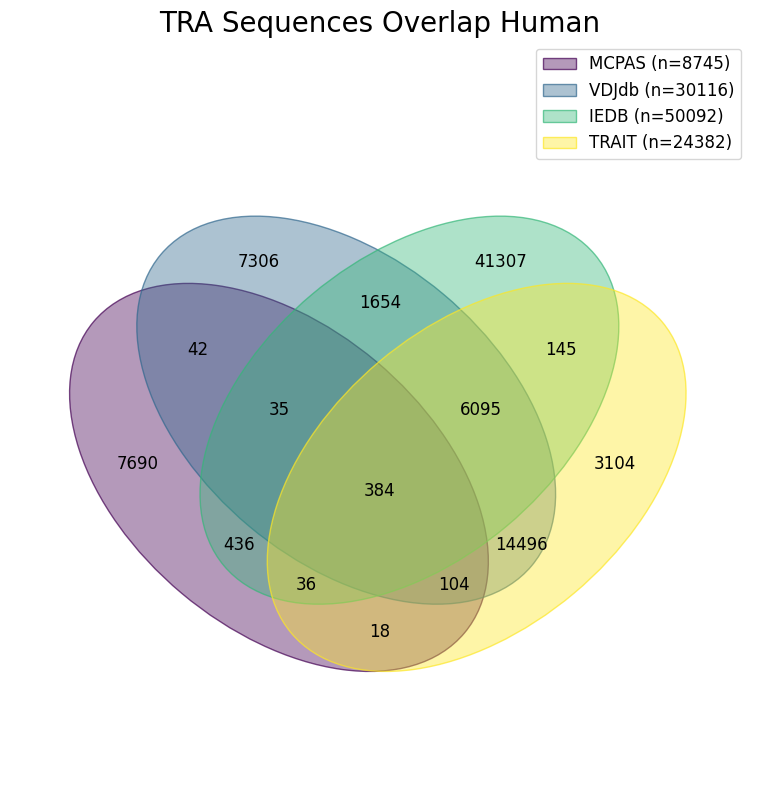

TRB Sequences:
                         Database   Count
0                          MCPAS   30055
1                          VDJdb   44898
2                           IEDB  167994
3                          TRAIT   39488
4                  MCPAS & VDJdb    2224
5                   MCPAS & IEDB    5441
6                  MCPAS & TRAIT    1978
7                   VDJdb & IEDB   15173
8                  VDJdb & TRAIT   36497
9                   IEDB & TRAIT   13886
10          MCPAS & VDJdb & IEDB    1735
11         MCPAS & VDJdb & TRAIT    1971
12          MCPAS & IEDB & TRAIT    1673
13          VDJdb & IEDB & TRAIT   13705
14  MCPAS & VDJdb & IEDB & TRAIT    1668


<Figure size 1200x1000 with 0 Axes>

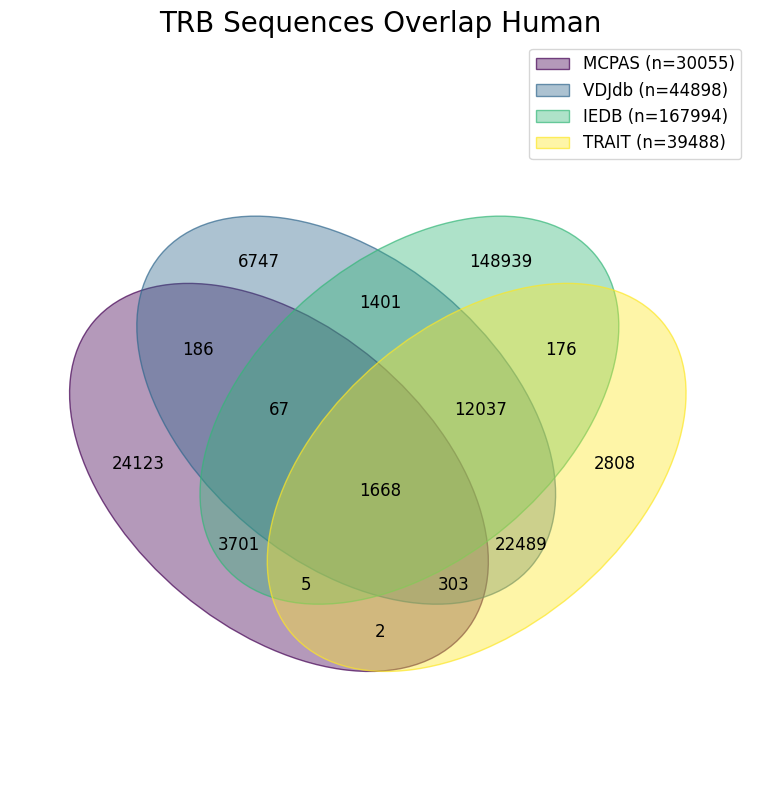

Epitope Sequences:
                         Database  Count
0                          MCPAS     27
1                          VDJdb    321
2                           IEDB   1697
3                          TRAIT    250
4                  MCPAS & VDJdb      5
5                   MCPAS & IEDB      8
6                  MCPAS & TRAIT      1
7                   VDJdb & IEDB     68
8                  VDJdb & TRAIT    186
9                   IEDB & TRAIT     58
10          MCPAS & VDJdb & IEDB      5
11         MCPAS & VDJdb & TRAIT      0
12          MCPAS & IEDB & TRAIT      1
13          VDJdb & IEDB & TRAIT     52
14  MCPAS & VDJdb & IEDB & TRAIT      0


<Figure size 1200x1000 with 0 Axes>

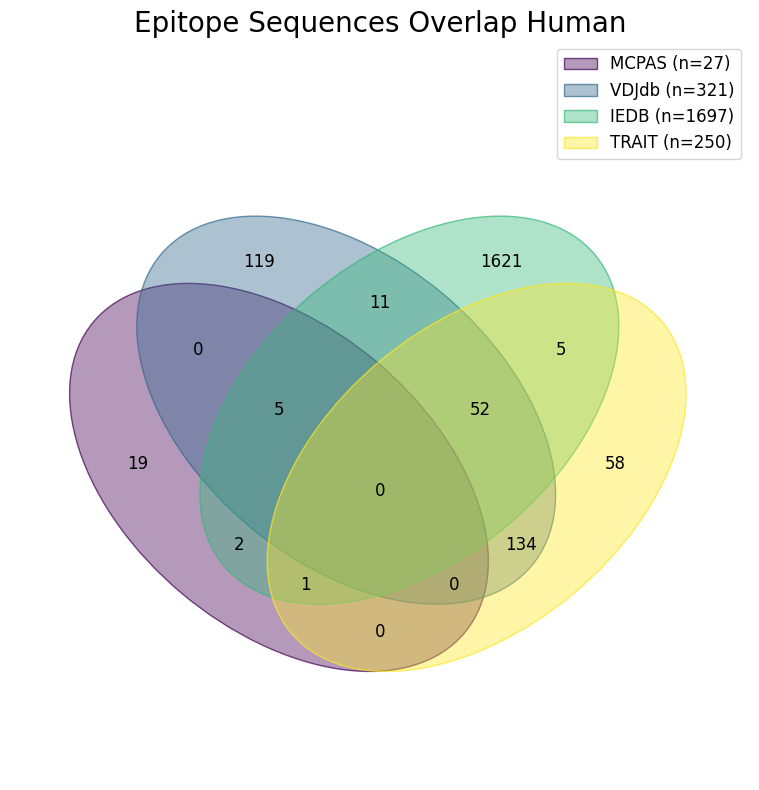

In [65]:
tra_dict = {
    'MCPAS': set(mcpas_human_tra["node_id"].unique()),
    'VDJdb': set(vdjdb_human_tra["node_id"].unique()),
    'IEDB': set(iedb_human_tra["node_id"].unique()),
    'TRAIT': set(trait_human_tra["node_id"].unique()),
    # 'CEDAR': set(cedar["tra sequence"]["node_id"].unique()),
}

trb_dict = {
    'MCPAS': set(mcpas_human_trb["node_id"].unique()),
    'VDJdb': set(vdjdb_human_trb["node_id"].unique()),
    'IEDB': set(iedb_human_trb["node_id"].unique()),
    'TRAIT': set(trait_human_trb["node_id"].unique()),
    # 'CEDAR': set(cedar["trb sequence"]["node_id"].unique()),
}

epi_dict = {
    'MCPAS': set(mcpas_human_epi["node_id"].unique()),
    'VDJdb': set(vdjdb_human_epi["node_id"].unique()),
    'IEDB': set(iedb_human_epi["node_id"].unique()),
    'TRAIT': set(trait_human_epi["node_id"].unique()),
    # 'CEDAR': set(cedar["epitope"]["node_id"].unique()),
}

# Generate plots and save stats
tra_stats = create_overlap_plot(tra_dict, 'TRA Sequences', '../data/pics/tra_overlap_human.png', 'data/stats/tra_summary.csv')
trb_stats = create_overlap_plot(trb_dict, 'TRB Sequences', '../data/pics/trb_overlap_human.png', 'data/stats/trb_summary.csv')
epi_stats = create_overlap_plot(epi_dict, 'Epitope Sequences', '../data/pics/epi_overlap_human.png', 'data/stats/epi_summary.csv')

TRA Sequences:
                         Database  Count
0                          MCPAS  10229
1                          VDJdb  31796
2                           IEDB  52756
3                          TRAIT  24399
4                  MCPAS & VDJdb    565
5                   MCPAS & IEDB    894
6                  MCPAS & TRAIT    542
7                   VDJdb & IEDB   9361
8                  VDJdb & TRAIT  21079
9                   IEDB & TRAIT   6663
10          MCPAS & VDJdb & IEDB    419
11         MCPAS & VDJdb & TRAIT    488
12          MCPAS & IEDB & TRAIT    420
13          VDJdb & IEDB & TRAIT   6479
14  MCPAS & VDJdb & IEDB & TRAIT    384


<Figure size 1200x1000 with 0 Axes>

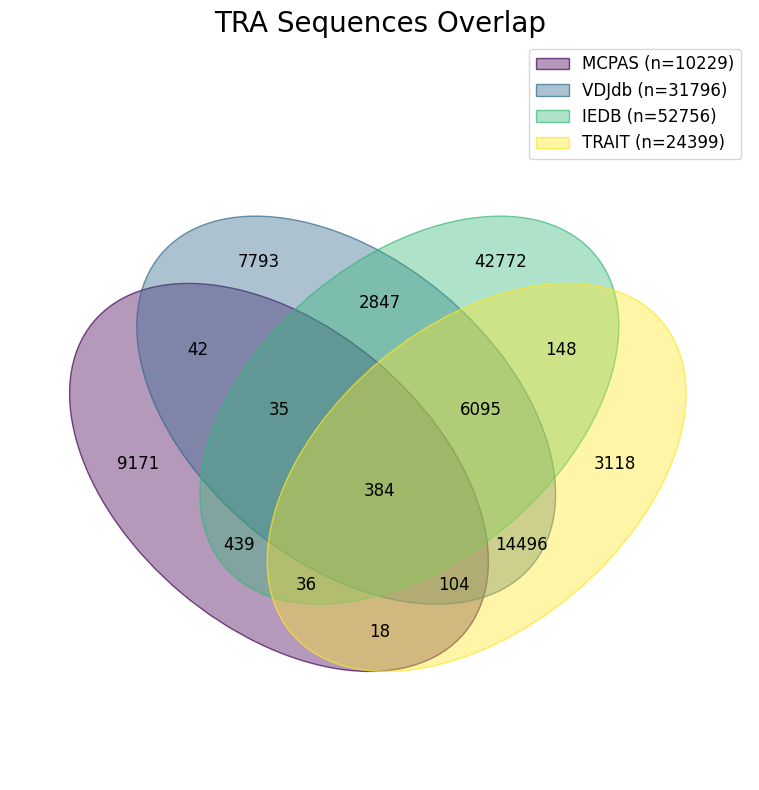

TRB Sequences:
                         Database   Count
0                          MCPAS   33131
1                          VDJdb   48856
2                           IEDB  173997
3                          TRAIT   39740
4                  MCPAS & VDJdb    2241
5                   MCPAS & IEDB    5621
6                  MCPAS & TRAIT    1985
7                   VDJdb & IEDB   16880
8                  VDJdb & TRAIT   36716
9                   IEDB & TRAIT   13891
10          MCPAS & VDJdb & IEDB    1745
11         MCPAS & VDJdb & TRAIT    1978
12          MCPAS & IEDB & TRAIT    1674
13          VDJdb & IEDB & TRAIT   13710
14  MCPAS & VDJdb & IEDB & TRAIT    1669


<Figure size 1200x1000 with 0 Axes>

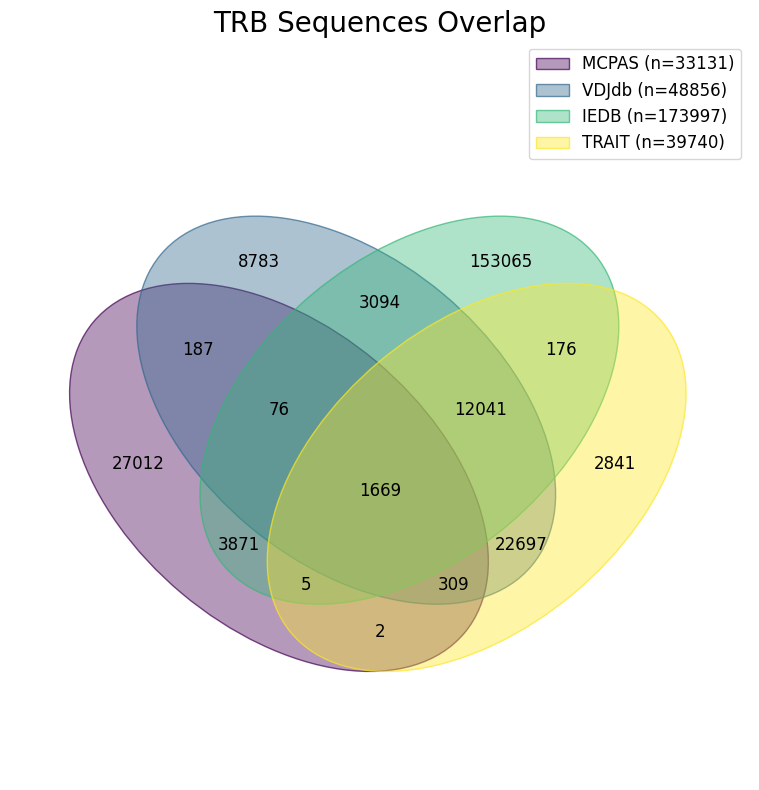

Epitope Sequences:
                         Database  Count
0                          MCPAS    379
1                          VDJdb   1343
2                           IEDB   7531
3                          TRAIT   1160
4                  MCPAS & VDJdb    115
5                   MCPAS & IEDB    312
6                  MCPAS & TRAIT     84
7                   VDJdb & IEDB   1015
8                  VDJdb & TRAIT   1075
9                   IEDB & TRAIT    998
10          MCPAS & VDJdb & IEDB     93
11         MCPAS & VDJdb & TRAIT     81
12          MCPAS & IEDB & TRAIT     72
13          VDJdb & IEDB & TRAIT    931
14  MCPAS & VDJdb & IEDB & TRAIT     69


<Figure size 1200x1000 with 0 Axes>

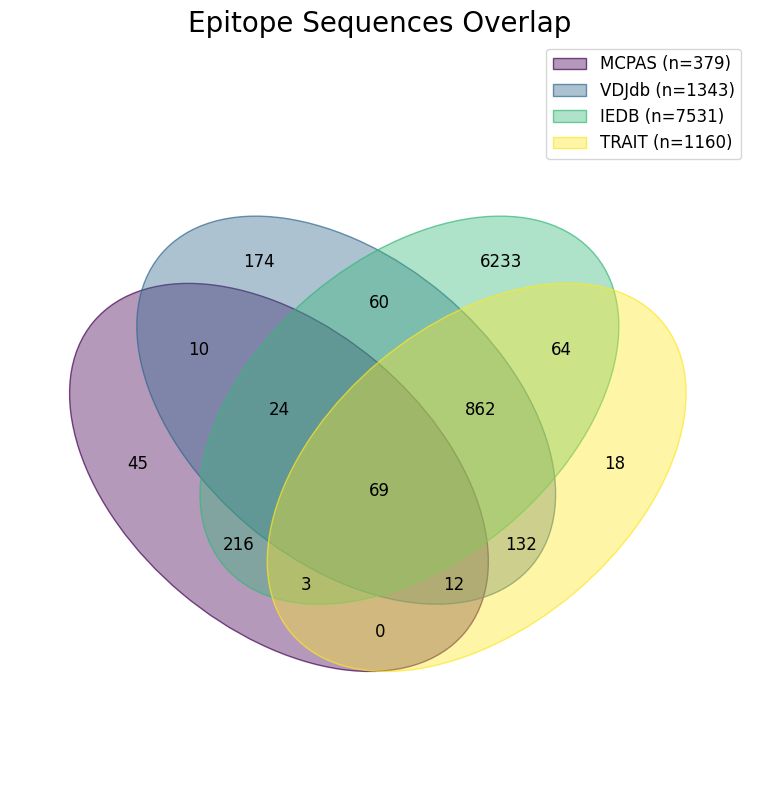

In [63]:
# Create data dictionaries
tra_dict = {
    'MCPAS': set(mcpas["tra sequence"]["node_id"].unique()),
    'VDJdb': set(vdjdb["tra sequence"]["node_id"].unique()),
    'IEDB': set(iedb["tra sequence"]["node_id"].unique()),
    'TRAIT': set(trait["tra sequence"]["node_id"].unique()),
    # 'CEDAR': set(cedar["tra sequence"]["node_id"].unique()),
}

trb_dict = {
    'MCPAS': set(mcpas["trb sequence"]["node_id"].unique()),
    'VDJdb': set(vdjdb["trb sequence"]["node_id"].unique()),
    'IEDB': set(iedb["trb sequence"]["node_id"].unique()),
    'TRAIT': set(trait["trb sequence"]["node_id"].unique()),
    # 'CEDAR': set(cedar["trb sequence"]["node_id"].unique()),
}

epi_dict = {
    'MCPAS': set(mcpas["epitope"]["node_id"].unique()),
    'VDJdb': set(vdjdb["epitope"]["node_id"].unique()),
    'IEDB': set(iedb["epitope"]["node_id"].unique()),
    'TRAIT': set(trait["epitope"]["node_id"].unique()),
    # 'CEDAR': set(cedar["epitope"]["node_id"].unique()),
}

# Generate plots and save stats
tra_stats = create_overlap_plot(tra_dict, 'TRA Sequences', '../data/pics/tra_overlap.png', 'data/stats/tra_summary.csv')
trb_stats = create_overlap_plot(trb_dict, 'TRB Sequences', '../data/pics/trb_overlap.png', 'data/stats/trb_summary.csv')
epi_stats = create_overlap_plot(epi_dict, 'Epitope Sequences', '../data/pics/epi_overlap.png', 'data/stats/epi_summary.csv')

TRA Sequences:
                         Database  Count
0                          MCPAS   9506
1                          VDJdb  29937
2                           IEDB  47558
3                          TRAIT  23523
4                  MCPAS & VDJdb      1
5                   MCPAS & IEDB    213
6                  MCPAS & TRAIT     93
7                   VDJdb & IEDB   1438
8                  VDJdb & TRAIT   8146
9                   IEDB & TRAIT    490
10          MCPAS & VDJdb & IEDB      0
11         MCPAS & VDJdb & TRAIT      0
12          MCPAS & IEDB & TRAIT     15
13          VDJdb & IEDB & TRAIT    354
14  MCPAS & VDJdb & IEDB & TRAIT      0


<Figure size 1000x1000 with 0 Axes>

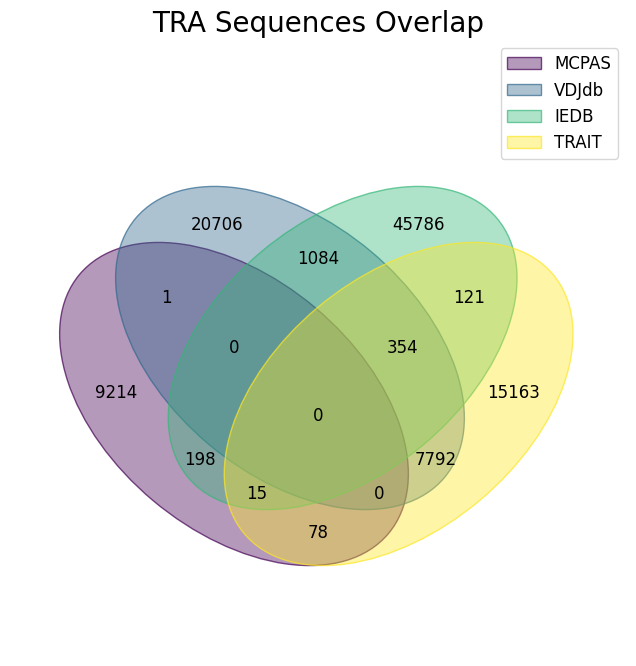

TRB Sequences:
                         Database   Count
0                          MCPAS   32177
1                          VDJdb   47780
2                           IEDB  156771
3                          TRAIT   39225
4                  MCPAS & VDJdb      78
5                   MCPAS & IEDB    4022
6                  MCPAS & TRAIT      45
7                   VDJdb & IEDB    1826
8                  VDJdb & TRAIT   22711
9                   IEDB & TRAIT     604
10          MCPAS & VDJdb & IEDB       1
11         MCPAS & VDJdb & TRAIT       2
12          MCPAS & IEDB & TRAIT      15
13          VDJdb & IEDB & TRAIT     533
14  MCPAS & VDJdb & IEDB & TRAIT       0


<Figure size 1000x1000 with 0 Axes>

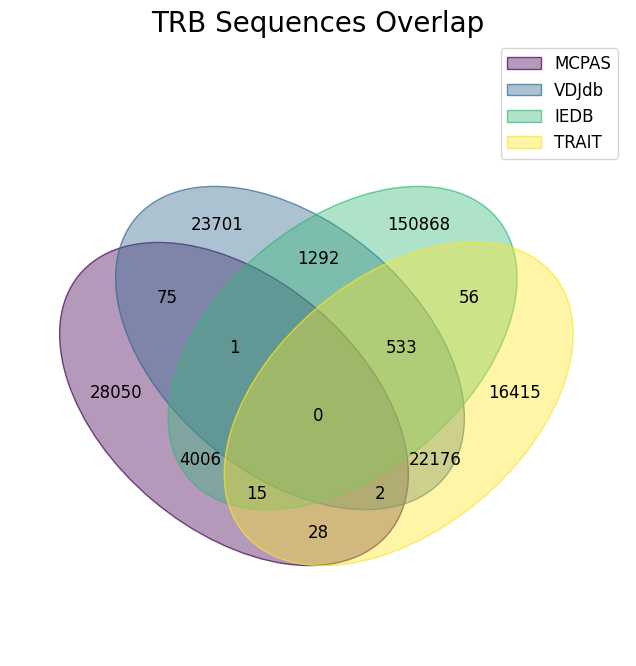

Epitope Sequences:
                         Database  Count
0                          MCPAS    379
1                          VDJdb   1343
2                           IEDB   7531
3                          TRAIT   1160
4                  MCPAS & VDJdb    115
5                   MCPAS & IEDB    312
6                  MCPAS & TRAIT     84
7                   VDJdb & IEDB   1015
8                  VDJdb & TRAIT   1075
9                   IEDB & TRAIT    998
10          MCPAS & VDJdb & IEDB     93
11         MCPAS & VDJdb & TRAIT     81
12          MCPAS & IEDB & TRAIT     72
13          VDJdb & IEDB & TRAIT    931
14  MCPAS & VDJdb & IEDB & TRAIT     69


<Figure size 1000x1000 with 0 Axes>

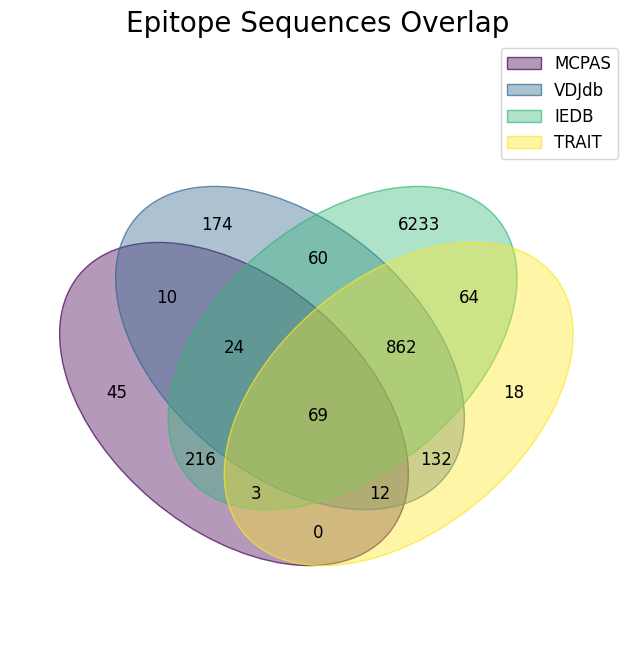

In [10]:
# Create data dictionaries
tra_dict = {
    'MCPAS': set(mcpas["tra sequence"]["node_id"].unique()),
    'VDJdb': set(vdjdb["tra sequence"]["node_id"].unique()),
    'IEDB': set(iedb["tra sequence"]["node_id"].unique()),
    'TRAIT': set(trait["tra sequence"]["node_id"].unique()),
    # 'CEDAR': set(cedar["tra sequence"]["node_id"].unique()),
}

trb_dict = {
    'MCPAS': set(mcpas["trb sequence"]["node_id"].unique()),
    'VDJdb': set(vdjdb["trb sequence"]["node_id"].unique()),
    'IEDB': set(iedb["trb sequence"]["node_id"].unique()),
    'TRAIT': set(trait["trb sequence"]["node_id"].unique()),
    # 'CEDAR': set(cedar["trb sequence"]["node_id"].unique()),
}

epi_dict = {
    'MCPAS': set(mcpas["epitope"]["node_id"].unique()),
    'VDJdb': set(vdjdb["epitope"]["node_id"].unique()),
    'IEDB': set(iedb["epitope"]["node_id"].unique()),
    'TRAIT': set(trait["epitope"]["node_id"].unique()),
    # 'CEDAR': set(cedar["epitope"]["node_id"].unique()),
}

# Generate plots and save stats
tra_stats = create_overlap_plot(tra_dict, 'TRA Sequences', 'data/pics/tra_overlap.png', 'data/stats/tra_summary.csv')
trb_stats = create_overlap_plot(trb_dict, 'TRB Sequences', 'data/pics/trb_overlap.png', 'data/stats/trb_summary.csv')
epi_stats = create_overlap_plot(epi_dict, 'Epitope Sequences', 'data/pics/epi_overlap.png', 'data/stats/epi_summary.csv')

### Compare IEDB and CEDAR first

TRA Sequences:
        Database  Count
0          IEDB  53451
1         CEDAR  43420
2  IEDB & CEDAR  43420


<Figure size 1000x1000 with 0 Axes>

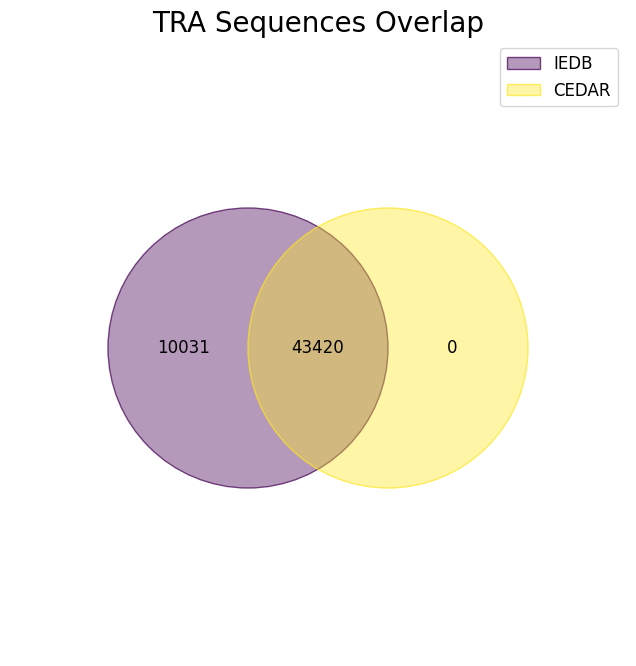

TRB Sequences:
        Database   Count
0          IEDB  175052
1         CEDAR   70055
2  IEDB & CEDAR   70055


<Figure size 1000x1000 with 0 Axes>

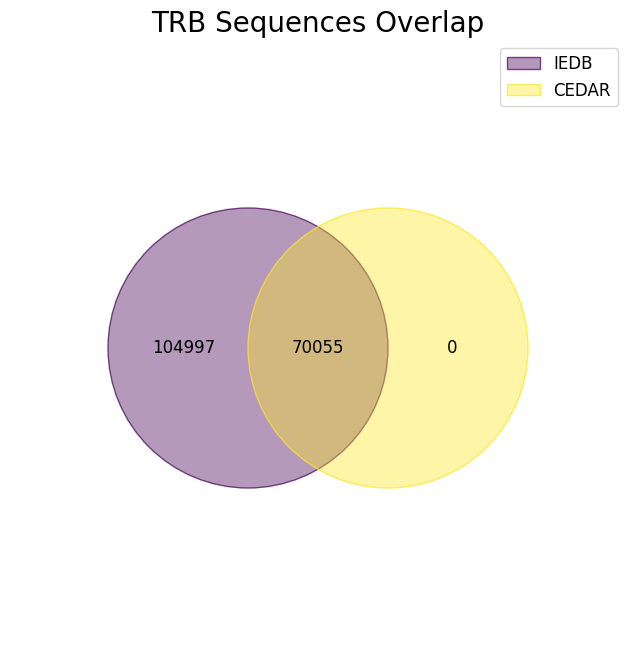

Epitope Sequences:
        Database  Count
0          IEDB   7531
1         CEDAR   2563
2  IEDB & CEDAR   2563


<Figure size 1000x1000 with 0 Axes>

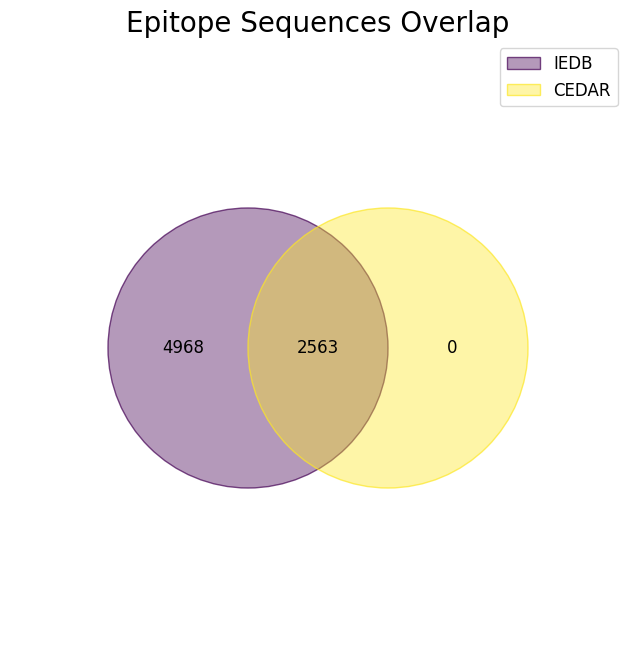

In [6]:
# Create data dictionaries
tra_dict = {
    'IEDB': set(iedb["tra sequence"]["node_id"].unique()),
    'CEDAR': set(cedar["tra sequence"]["node_id"].unique()),
}

trb_dict = {
    'IEDB': set(iedb["trb sequence"]["node_id"].unique()),
    'CEDAR': set(cedar["trb sequence"]["node_id"].unique()),
}

epi_dict = {
    'IEDB': set(iedb["epitope"]["node_id"].unique()),
    'CEDAR': set(cedar["epitope"]["node_id"].unique()),
}

# Generate plots and save stats
tra_stats = create_overlap_plot(tra_dict, 'TRA Sequences', 'data/pics/tra_overlap.png', 'data/stats/tra_summary.csv')
trb_stats = create_overlap_plot(trb_dict, 'TRB Sequences', 'data/pics/trb_overlap.png', 'data/stats/trb_summary.csv')
epi_stats = create_overlap_plot(epi_dict, 'Epitope Sequences', 'data/pics/epi_overlap.png', 'data/stats/epi_summary.csv')

In [22]:
set(iedb["tra sequence"]["node_id"].unique()) - set(cedar["tra sequence"]["node_id"].unique())

{'tra:CALVPNYGNEKITF:v_TRAV6D-4:j_TRAJ48',
 'tra:AATGSFNKLT',
 'tra:CAGGAGANNLFF:v_TRAV27:j_TRAJ36',
 'tra:CAVED#ISSGSARQLTF:v_TRAV36/DV7*02:j_TRAJ22*01',
 'tra:CAWGRGANNLFF:v_TRAV25:j_TRAJ36',
 'tra:CAVARASKLTF:v_TRAV22*01:j_TRAJ44*01',
 'tra:CAVRSISSGSARQLTF',
 'tra:CAGESNNNDMPF:v_TRAV27*01:j_TRAJ43*01',
 'tra:CAESNFNKFYF:v_TRAV13-2:j_TRAJ21',
 'tra:CALSPYSGGSNYKLTF:v_TRAV9-2:j_TRAJ53',
 'tra:ASSGXGGQPQH:v_TCRAV8-6*02:j_TCRAJ52*01',
 'tra:CAVFALDGQNFVF:v_TRAV3:j_TRAJ26',
 'tra:CILSSPDKLIF:v_TRAV26-2:j_TRAJ34',
 'tra:CAGVGSQGNLIF:v_TRAV27:j_TRAJ42',
 'tra:CATWDRPNYYKKLF:v_TRGV3:j_TRGJ1',
 'tra:CVLSAPNTGGLSGKLTF:v_TRAV9-2:j_TRAJ2',
 'tra:CALSYLGLQAGTALIF:v_TRAV19:j_TRAJ15',
 'tra:CALGAYANKMIF:v_TRAV6-6:j_TRAJ47',
 'tra:CALSEGQGGRALIF:v_TRAV6-5:j_TRAJ15',
 'tra:AWGHSGGPTNTEAF:v_36/DV7*01:j_TCRAJ44*01',
 'tra:CAVRDLTNTGNQFYF:v_TRAV3:j_TRAJ49',
 'tra:CAEDSDTGRRALTF:v_TRAV5',
 'tra:AASITLVDARLM:v_TCRAV13-01:j_TCRAJ31-01*01',
 'tra:CIVRVAGYGGSQGNLIF:v_TRAV26-1:j_TRAJ42',
 'tra:CAMSLTGFASALT

In [20]:
set(cedar["tra sequence"]["node_id"].unique()) - set(iedb["tra sequence"]["node_id"].unique())

{'tra:AAISNTGKLI:v_TCRAV13-1:j_TCRAJ37',
 'tra:AASSIQGAQKLV:v_TCRAV23/6:j_TCRAJ54',
 'tra:AASSQGGKLI:v_TCRAV13-1:j_TCRAJ23',
 'tra:AATDSWGKLQ:v_TCRAV21:j_TCRAJ24',
 'tra:AFMDSNYQLI:v_TCRAV1-2:j_TCRAJ33',
 'tra:AGAGSQGNLI:v_TCRAV27:j_TCRAJ42',
 'tra:AGAQGSSNTGKLI:v_TCRAV27:j_TCRAJ37',
 'tra:AGASNTGKLI:v_TCRAV27:j_TCRAJ37',
 'tra:AGGGSQGNLI:v_TCRAV27:j_TCRAJ42',
 'tra:AGGGSSNTGKLI:v_TCRAV27:j_TCRAJ37',
 'tra:AGPGTNAGKST:v_TCRAV27:j_TCRAJ27-1',
 'tra:AGSSGNTGKLI:v_TCRAV27:j_TCRAJ37',
 'tra:ALNTGGFKTI:v_TCRAV6:j_TCRAJ9',
 'tra:APLDSNYQLI:v_TCRAV1-2:j_TCRAJ33',
 'tra:ATDTTSGTYKYI:v_TRAV17*01 :j_TRAJ40*01',
 'tra:AVGDDKII:v_TRAV12-3:j_TRAJ30',
 'tra:AVKDDKII:v_TCRAV8-1:j_TCRAJ30',
 'tra:AVLNTGGFKTI:v_TCRAV22:j_TCRAJ9',
 'tra:AVRDDKII:v_TCRAV20:j_TCRAJ30',
 'tra:AVRDGDYKLS:v_TCRAV1-2:j_TCRAJ20',
 'tra:AVRDSNYQLI:v_TCRAV21:j_TCRAJ33',
 'tra:AVSGTYKYI:v_TCRAV12:j_TCRAJ40-1',
 'tra:AVSGYSTLT:v_TCRAV21:j_TCRAJ11',
 'tra:AVSSNDYKLS:v_TCRAV12:j_TCRAJ20-1',
 'tra:AVSSTDKLI:v_TRAV12-3:j_TRAJ34',
 'tr

In [16]:
tra_dict = {
    'IEDB': set(iedb["tra sequence"]["node_id"].unique()),
    'CEDAR': set(cedar["tra sequence"]["node_id"].unique()),
}

trb_dict = {
    'IEDB': set(iedb["trb sequence"]["node_id"].unique()),
    'CEDAR': set(cedar["trb sequence"]["node_id"].unique()),
}

SyntaxError: incomplete input (1166138304.py, line 1)

### Continue with comparison without CEDAR, since it is a partial set of IEDB

TRA Sequences:
                         Database  Count
0                          MCPAS   9506
1                          VDJdb  29922
2                           IEDB  47558
3                          TRAIT  23523
4                  MCPAS & VDJdb   3054
5                   MCPAS & IEDB   3322
6                  MCPAS & TRAIT   1817
7                   VDJdb & IEDB  17846
8                  VDJdb & TRAIT  20884
9                   IEDB & TRAIT  16692
10          MCPAS & VDJdb & IEDB   2278
11         MCPAS & VDJdb & TRAIT   1698
12          MCPAS & IEDB & TRAIT   1182
13          VDJdb & IEDB & TRAIT  15297
14  MCPAS & VDJdb & IEDB & TRAIT   1119


<Figure size 1000x1000 with 0 Axes>

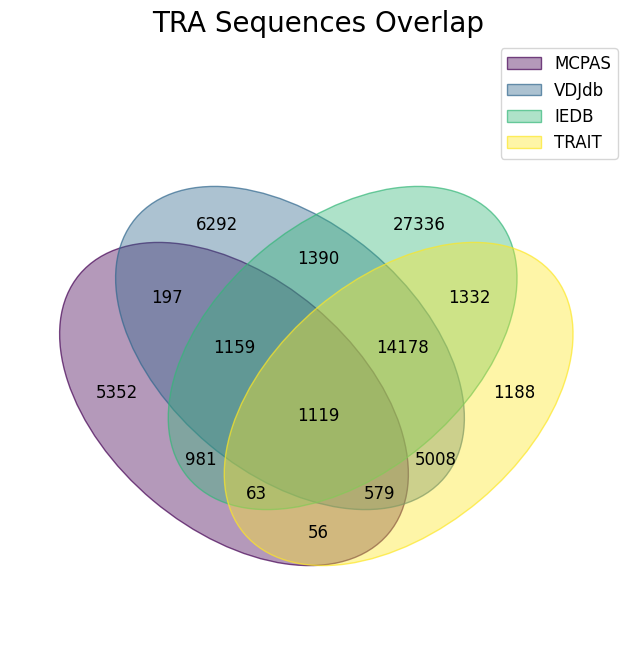

TRB Sequences:
                         Database   Count
0                          MCPAS   32177
1                          VDJdb   47757
2                           IEDB  156771
3                          TRAIT   39225
4                  MCPAS & VDJdb    5425
5                   MCPAS & IEDB    7723
6                  MCPAS & TRAIT    3984
7                   VDJdb & IEDB   24366
8                  VDJdb & TRAIT   36661
9                   IEDB & TRAIT   22964
10          MCPAS & VDJdb & IEDB    3675
11         MCPAS & VDJdb & TRAIT    3923
12          MCPAS & IEDB & TRAIT    2445
13          VDJdb & IEDB & TRAIT   21447
14  MCPAS & VDJdb & IEDB & TRAIT    2418


<Figure size 1000x1000 with 0 Axes>

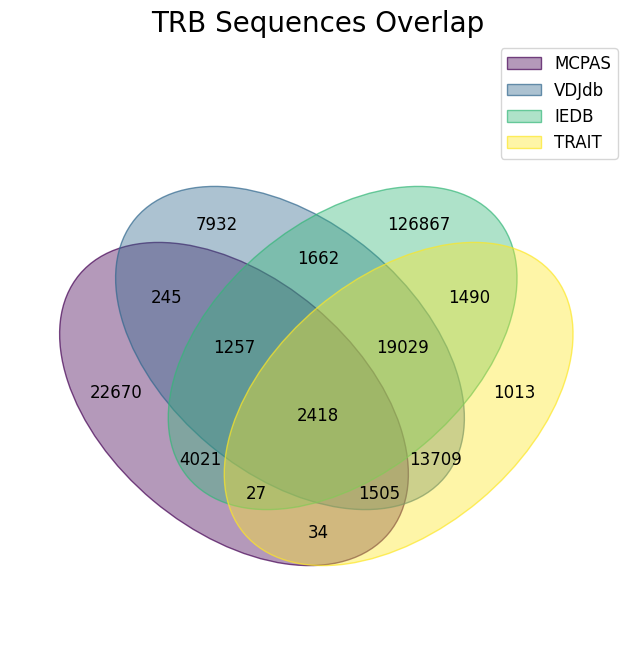

Epitope Sequences:
                         Database  Count
0                          MCPAS    379
1                          VDJdb   1343
2                           IEDB   7531
3                          TRAIT   1160
4                  MCPAS & VDJdb    115
5                   MCPAS & IEDB    312
6                  MCPAS & TRAIT     84
7                   VDJdb & IEDB   1015
8                  VDJdb & TRAIT   1075
9                   IEDB & TRAIT    998
10          MCPAS & VDJdb & IEDB     93
11         MCPAS & VDJdb & TRAIT     81
12          MCPAS & IEDB & TRAIT     72
13          VDJdb & IEDB & TRAIT    931
14  MCPAS & VDJdb & IEDB & TRAIT     69


<Figure size 1000x1000 with 0 Axes>

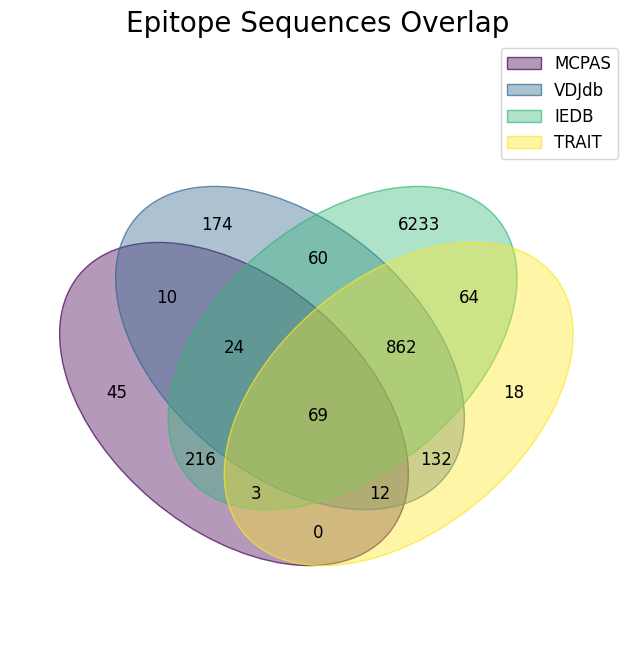

In [35]:
# Create data dictionaries
tra_dict = {
    'MCPAS': set(mcpas["tra sequence"]["node_id"].unique()),
    'VDJdb': set(vdjdb["tra sequence"]["node_id"].unique()),
    'IEDB': set(iedb["tra sequence"]["node_id"].unique()),
    'TRAIT': set(trait["tra sequence"]["node_id"].unique()),
    # 'CEDAR': set(cedar["tra sequence"]["node_id"].unique()),
}

trb_dict = {
    'MCPAS': set(mcpas["trb sequence"]["node_id"].unique()),
    'VDJdb': set(vdjdb["trb sequence"]["node_id"].unique()),
    'IEDB': set(iedb["trb sequence"]["node_id"].unique()),
    'TRAIT': set(trait["trb sequence"]["node_id"].unique()),
    # 'CEDAR': set(cedar["trb sequence"]["node_id"].unique()),
}

epi_dict = {
    'MCPAS': set(mcpas["epitope"]["node_id"].unique()),
    'VDJdb': set(vdjdb["epitope"]["node_id"].unique()),
    'IEDB': set(iedb["epitope"]["node_id"].unique()),
    'TRAIT': set(trait["epitope"]["node_id"].unique()),
    # 'CEDAR': set(cedar["epitope"]["node_id"].unique()),
}

# Generate plots and save stats
tra_stats = create_overlap_plot(tra_dict, 'TRA Sequences', 'data/pics/tra_overlap.png', 'data/stats/tra_summary.csv')
trb_stats = create_overlap_plot(trb_dict, 'TRB Sequences', 'data/pics/trb_overlap.png', 'data/stats/trb_summary.csv')
epi_stats = create_overlap_plot(epi_dict, 'Epitope Sequences', 'data/pics/epi_overlap.png', 'data/stats/epi_summary.csv')

## 3. Visualize the sequences lengths overlaps

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-pastel')

def extract_sequence_length(sequence_series):
    """Extracts sequence after ':' and computes its length."""
    return sequence_series.str.split(":").str[-1].str.len()

def plot_length_distribution(data_dict, title, save_path):
    """Plots overlayed histograms for TRA, TRB, or Epitope sequences from 3 databases."""
    
    plt.figure(figsize=(10, 6))
    
    # Overlay histograms for the three databases
    for db_name, lengths in data_dict.items():
        plt.hist(lengths, bins=20, alpha=0.6, label=db_name)

    # Labels and legend
    plt.xlabel("Sequence Length")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.yscale("log")
    plt.legend()

    # Save and show plot
    # plt.savefig(save_path)
    plt.show()
    plt.close()

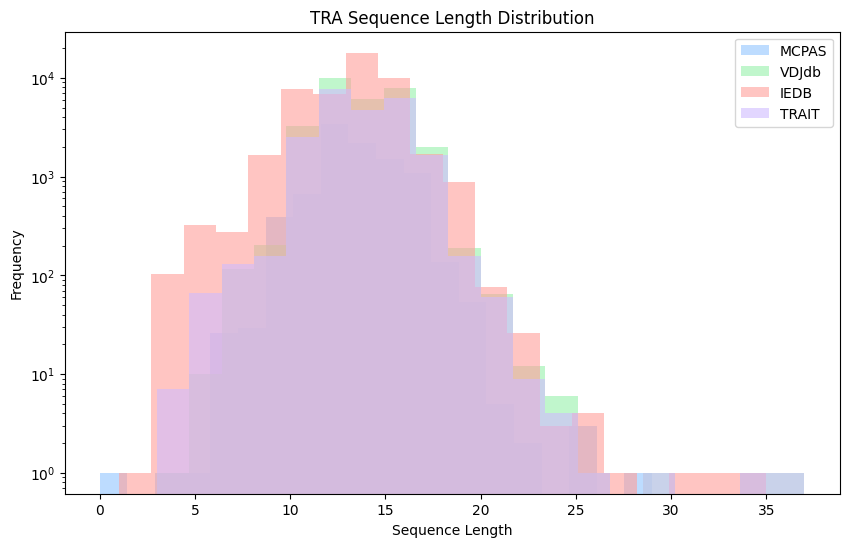

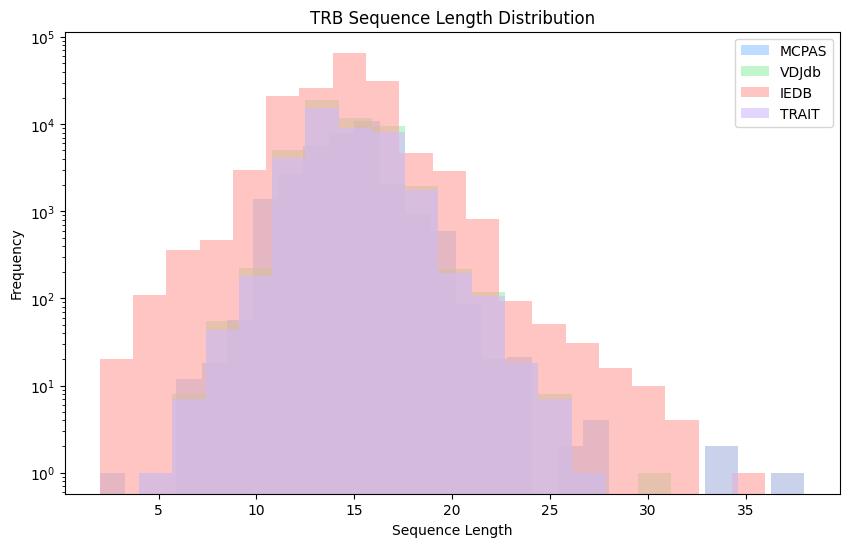

In [36]:
# Extract sequence lengths from each database
tra_lengths = {
    "MCPAS": extract_sequence_length(mcpas["tra sequence"]["node_id"]),
    "VDJdb": extract_sequence_length(vdjdb["tra sequence"]["node_id"]),
    "IEDB": extract_sequence_length(iedb["tra sequence"]["node_id"]),
    "TRAIT": extract_sequence_length(trait["tra sequence"]["node_id"]),
    # "CEDAR": extract_sequence_length(cedar["tra sequence"]["node_id"])
}

trb_lengths = {
    "MCPAS": extract_sequence_length(mcpas["trb sequence"]["node_id"]),
    "VDJdb": extract_sequence_length(vdjdb["trb sequence"]["node_id"]),
    "IEDB": extract_sequence_length(iedb["trb sequence"]["node_id"]),
    "TRAIT": extract_sequence_length(trait["trb sequence"]["node_id"]),
    # "CEDAR": extract_sequence_length(cedar["trb sequence"]["node_id"])
}


# Generate and save the plots
plot_length_distribution(tra_lengths, "TRA Sequence Length Distribution", "data/pics/tra_lengths.png")
plot_length_distribution(trb_lengths, "TRB Sequence Length Distribution", "data/pics/trb_lengths.png")

In [37]:
import pandas as pd

def count_sequences(mcpas, vdjdb, iedb):
    """Counts TRA, TRB, and Pairing sequences separately for each dataset."""
    
    # Count TRA (non-null "tra sequence")
    tra_counts = {
        "MCPAS": mcpas["tra sequence"]["node_id"].notna().sum(),
        "VDJdb": vdjdb["tra sequence"]["node_id"].notna().sum(),
        "IEDB": iedb["tra sequence"]["node_id"].notna().sum(),
        "TRAIT": trait["tra sequence"]["node_id"].notna().sum(),
    }

    # Count TRB (non-null "trb sequence")
    trb_counts = {
        "MCPAS": mcpas["trb sequence"]["node_id"].notna().sum(),
        "VDJdb": vdjdb["trb sequence"]["node_id"].notna().sum(),
        "IEDB": iedb["trb sequence"]["node_id"].notna().sum(),
        "TRAIT": trait["trb sequence"]["node_id"].notna().sum(),
    }

    # Count Pairing (length of "alpha sequence to beta sequence association")
    pairing_counts = {
        "MCPAS": len(mcpas["alpha sequence to beta sequence association"]) if "alpha sequence to beta sequence association" in mcpas else 0,
        "VDJdb": len(vdjdb["alpha sequence to beta sequence association"]) if "alpha sequence to beta sequence association" in vdjdb else 0,
        "IEDB": len(iedb["alpha sequence to beta sequence association"]) if "alpha sequence to beta sequence association" in iedb else 0,
        "TRAIT": len(trait["alpha sequence to beta sequence association"]) if "alpha sequence to beta sequence association" in trait else 0,
    }

    # Convert to DataFrame
    counts_df = pd.DataFrame({
        "TRA": tra_counts,
        "TRB": trb_counts,
        "Pairing": pairing_counts
    }).T  # Transpose for readability

    return counts_df

# Run the function
sequence_counts = count_sequences(mcpas, vdjdb, iedb)

# Print the results
print(sequence_counts)


         MCPAS  VDJdb    IEDB  TRAIT
TRA       9506  29922   47558  23523
TRB      32177  47757  156771  39225
Pairing  10366      0   28979  25097


In [33]:
tra_calculated = 224498 - 223007
tra_curated = 224498 - 161958
trb_calculated = 224498 - 84836
trb_curated = 224498 - 32721
print(tra_calculated, tra_curated)
print(trb_calculated, trb_curated)

1491 62540
139662 191777
